In [1]:
import sqlite3 #database
import os #general
import time #general
from tqdm import tqdm #inline progress bar (quality of life)

import csv

import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
#returns all the rows of the databse as a triplit (filename, code, comment)
def get_all_data():
    #start timer
    start = time.time()
    
    #connect to database
    pwd = os.getcwd()
    db_file = pwd+'/code_and_comments/all_data.db'
    conn = sqlite3.connect(db_file)
    
    #get all the rows from the databse
    cur = conn.cursor()
    cur.execute("SELECT * FROM all_data")
    rows = cur.fetchall()
    
    #wrapp it up
    conn.close()
    end = time.time()
    print("Completed in %d seconds" % (end - start))
    
    return rows



def show_hist(data,ma,mi):
    bins = np.linspace(math.ceil(min(data)), 
                       math.floor(max(data)),
                       ma-mi) # fixed number of bins

    plt.xlim([min(data), max(data)])

    plt.hist(data, bins=bins, alpha=0.5)
    plt.title('Code Snippet length')
    plt.xlabel('Number of Lines')
    plt.ylabel('Number of Samples')

    plt.show()
    
    
def save_data(lang,code_sippets,comments,code_ma,text_ma):
    print('saving data for langauge',lang,'...')
    file_name = 'code-comment-'+str(lang)+'.csv'
    with open(file_name, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Code','Comment'])
        for c in range(len(code_snippets)):
            writer.writerow([code_snippets[c],comments[c]])

#takes a dictionary and item for the purpose of counting number of items of that type
def dic_count(dic, item):
    if item in dic:
        dic[item] = dic[item]+1
    else:
        dic[item] = 1
    return dic
    
#returns the number of each extention in database
def get_extention_stats(rows):
    extention_count={}
    for row in tqdm(rows):
        filename = row[0]
        extention = filename.split('.')[-1]
        extention_count=dic_count(extention_count,extention)

    print(extention_count)

    
def get_python_pairs(rows):
    code_snippets = []
    comments = []
    too_big = 0
    for row in tqdm(rows):
        filename = row[0]
        extention = filename.split('.')[-1]
        if extention == 'py':
            #limit the size
            code_size = len(row[1])
            comment_size = len(row[2])
            if code_size<100 and code_size>10 and comment_size<100 and comment_size>10:
                code_snippets.append(row[1])
                comments.append(row[2])
            else:
                too_big+=1
    print('Total pairs:',len(comments))
    return code_snippets, comments


    print(extention_count)
    
def get_code_pairs(rows, lang, max_code_chars, max_text_chars, max_lines, min_lines):
    
    #loop through code pairs
    code_snippets = []
    comments = []
    data = []
    
    #for row in tqdm(rows[:100000]):
    for row in tqdm(rows):
        
        #check code type
        filename = row[0]
        extention = filename.split('.')[-1]
        if extention in lang:
            
            #limit the size
            code_size    = len(row[1])
            comment_size = len(row[2])
            num_lines    = row[1].count('\n')
            
            if code_size<max_code_chars and code_size>10:
                if comment_size<max_text_chars and comment_size>10:
                    if num_lines < max_lines and num_lines > min_lines:
                        if '\0' not in row[1] and '\0' not in row[2]:
                            code_snippets.append(row[1])
                            comments.append(row[2])
                            #code_snippets.append(row[1].replace('\0',''))
                            #comments.append(row[2].replace(,''))
                            data.append(num_lines)

    print('Total pairs:',len(comments))
    #show_hist(data, max_lines, min_lines)
    return code_snippets, comments


  0%|          | 26921/16115540 [00:00<00:59, 269175.60it/s]

Completed in 144 seconds
number of samples: 16115540


100%|██████████| 16115540/16115540 [00:57<00:00, 278986.17it/s]


Show # of line histogram of our preprocessed data


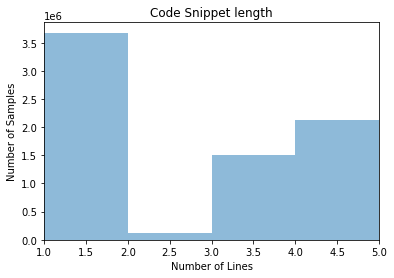

100%|██████████| 16115540/16115540 [00:10<00:00, 1500523.49it/s]


Total pairs: 384273
saving data for langauge short_py ...


100%|██████████| 16115540/16115540 [00:09<00:00, 1614743.41it/s]


Total pairs: 1579745
saving data for langauge short_cpp ...


100%|██████████| 16115540/16115540 [00:14<00:00, 1102631.71it/s]


Total pairs: 2234084
saving data for langauge short_java ...


100%|██████████| 16115540/16115540 [00:21<00:00, 761740.41it/s]


Total pairs: 4198102
saving data for langauge short_all ...


In [3]:
#short 0-5


rows = get_all_data()
print('number of samples:',len(rows))



#iterate through the rows and getting suitable information info
data=[]
max_lines = 5
min_lines = 0

#for row in rows[:100000]:
for row in tqdm(rows):
    filename = row[0]
    code = row[1]
    comment = row[2] 
    #print(code.count('\n'))
    if code.count('\n')>min_lines and code.count('\n')<max_lines+1:
        data.append(code.count('\n'))
        

print('Show # of line histogram of our preprocessed data')
show_hist(data,max_lines,min_lines)


Python = ['py']
CPP    = ['cpp','h']
JAVA   = ['java']
multi  = Python + CPP + JAVA

max_code_chars = 500
max_text_chars = 250

#just python
#code_snippets, comments = get_code_pairs(rows, multi, max_code_chars, max_text_chars, max_lines, min_lines)
#save_data('py', code_snippets, comments,  max_code_chars, max_text_chars) #all

#'''
#individual languages
for lang in [Python,CPP,JAVA]:
    code_snippets, comments = get_code_pairs(rows, lang, max_code_chars, max_text_chars, max_lines, min_lines)
    save_data('short_'+lang[0], code_snippets, comments,  max_code_chars, max_text_chars)

    
#multiple languagse
code_snippets, comments = get_code_pairs(rows, multi, max_code_chars, max_text_chars, max_lines, min_lines)
save_data('short_all', code_snippets, comments,  max_code_chars, max_text_chars) #all
#'''

  0%|          | 56818/16115540 [00:00<00:28, 568175.12it/s]

Completed in 141 seconds
number of samples: 16115540


100%|██████████| 16115540/16115540 [00:51<00:00, 314709.32it/s]


Show # of line histogram of our preprocessed data


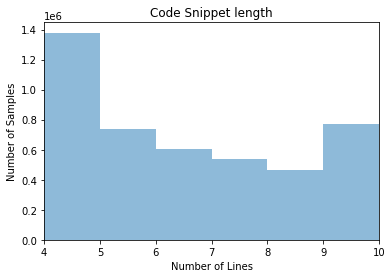

100%|██████████| 16115540/16115540 [00:10<00:00, 1494036.56it/s]


Total pairs: 1090471
saving data for langauge medium_py ...


100%|██████████| 16115540/16115540 [00:09<00:00, 1678466.25it/s]


Total pairs: 648939
saving data for langauge medium_cpp ...


100%|██████████| 16115540/16115540 [00:14<00:00, 1123430.66it/s]


Total pairs: 1030611
saving data for langauge medium_java ...


100%|██████████| 16115540/16115540 [00:21<00:00, 767281.08it/s]


Total pairs: 2770021
saving data for langauge medium_all ...


In [3]:
#med 3-10

rows = get_all_data()
print('number of samples:',len(rows))



#iterate through the rows and getting suitable information info
data=[]
max_lines = 10
min_lines = 3

#for row in rows[:100000]:
for row in tqdm(rows):
    filename = row[0]
    code = row[1]
    comment = row[2] 
    #print(code.count('\n'))
    if code.count('\n')>min_lines and code.count('\n')<max_lines+1:
        data.append(code.count('\n'))
        

print('Show # of line histogram of our preprocessed data')
show_hist(data,max_lines,min_lines)


Python = ['py']
CPP    = ['cpp','h']
JAVA   = ['java']
multi  = Python + CPP + JAVA

max_code_chars = 500
max_text_chars = 250

#just python
#code_snippets, comments = get_code_pairs(rows, multi, max_code_chars, max_text_chars, max_lines, min_lines)
#save_data('py', code_snippets, comments,  max_code_chars, max_text_chars) #all

#'''
#individual languages
for lang in [Python,CPP,JAVA]:
    code_snippets, comments = get_code_pairs(rows, lang, max_code_chars, max_text_chars, max_lines, min_lines)
    save_data('medium_'+lang[0], code_snippets, comments,  max_code_chars, max_text_chars)

    
#multiple languagse
code_snippets, comments = get_code_pairs(rows, multi, max_code_chars, max_text_chars, max_lines, min_lines)
save_data('medium_all', code_snippets, comments,  max_code_chars, max_text_chars) #all
#'''

  0%|          | 24073/16115540 [00:00<01:06, 240723.34it/s]

Completed in 167 seconds
number of samples: 16115540


100%|██████████| 16115540/16115540 [01:15<00:00, 212733.53it/s]


Show # of line histogram of our preprocessed data


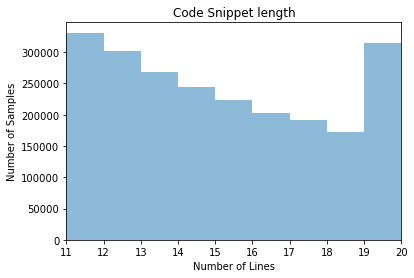

100%|██████████| 16115540/16115540 [00:22<00:00, 719013.15it/s]


Total pairs: 798480
saving data for langauge py ...


"\n#individual languages\nfor lang in [Python,CPP,JAVA]:\n    code_snippets, comments = get_code_pairs(rows, lang, max_code_chars, max_text_chars, max_lines, min_lines)\n    save_data('long_'+lang[0], code_snippets, comments,  max_code_chars, max_text_chars)\n\n    \n#multiple languagse\ncode_snippets, comments = get_code_pairs(rows, multi, max_code_chars, max_text_chars, max_lines, min_lines)\nsave_data('long_all', code_snippets, comments,  max_code_chars, max_text_chars) #all\n"

In [3]:
#long 10-20

rows = get_all_data()
print('number of samples:',len(rows))



#iterate through the rows and getting suitable information info
data=[]
max_lines = 20
min_lines = 10

#for row in rows[:100000]:
for row in tqdm(rows):
    filename = row[0]
    code = row[1]
    comment = row[2] 
    #print(code.count('\n'))
    if code.count('\n')>min_lines and code.count('\n')<max_lines+1:
        data.append(code.count('\n'))
        

print('Show # of line histogram of our preprocessed data')
show_hist(data,max_lines,min_lines)


Python = ['py']
CPP    = ['cpp','h']
JAVA   = ['java']
multi  = Python + CPP + JAVA

max_code_chars = 500
max_text_chars = 250

#just python
code_snippets, comments = get_code_pairs(rows, multi, max_code_chars, max_text_chars, max_lines, min_lines)
save_data('py', code_snippets, comments,  max_code_chars, max_text_chars) #all

'''
#individual languages
for lang in [Python,CPP,JAVA]:
    code_snippets, comments = get_code_pairs(rows, lang, max_code_chars, max_text_chars, max_lines, min_lines)
    save_data('long_'+lang[0], code_snippets, comments,  max_code_chars, max_text_chars)

    
#multiple languagse
code_snippets, comments = get_code_pairs(rows, multi, max_code_chars, max_text_chars, max_lines, min_lines)
save_data('long_all', code_snippets, comments,  max_code_chars, max_text_chars) #all
'''

In [17]:
#get all extention types
'''
types=[]
for row in tqdm(rows[:1000000]):
    types.append(row[0].split('.')[-1])
for t in set(types):
    print(t,types.count(t))
    
'''

#example of how ot iterate through the rows and getting info
'''
for row in rows[:100]:
    filename = row[0]
    code = row[1]
    comment = row[2]  
'''

"\ntypes=[]\nfor row in tqdm(rows[:1000000]):\n    types.append(row[0].split('.')[-1])\nfor t in set(types):\n    print(t,types.count(t))\n    \n"